In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

import helper_functions

--2024-01-01 04:42:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-01 04:42:26 (84.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

helper_functions.unzip_data('10_food_classes_10_percent.zip')

--2023-12-31 15:50:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  25.4MB/s    in 8.2s    

2023-12-31 15:50:40 (19.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
helper_functions.walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_10_percent/train',
                                                image_size=(224,224),label_mode='categorical')


test_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_10_percent/test',
                                                image_size=(224,224),label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
labels = train_data.class_names
labels

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense


base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input((224,224,3), name='input_layer')
x = base_model(inputs)
print(f'BaseModel shape => {x.shape}')
x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pooling_layer')(x)
print(f'Pooling shape => {x.shape}')
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax', name='output_layer')(x)
print(f'Output shape => {outputs.shape}')


model = Model(inputs,outputs)

16705208/16705208 [==============================] - 2s 0us/step
BaseModel shape => (None, 7, 7, 1280)
Pooling shape => (None, 1280)
Output shape => (None, 10)


In [ ]:
model.compile(loss='CategoricalCrossentropy',optimizer='Adam', metrics=['accuracy'])
history = model.fit(train_data,epochs=5, validation_data = test_data)

Epoch 1/5
24/24 [==============================] - 22s 495ms/step - loss: 1.8452 - accuracy: 0.4773 - val_loss: 1.1461 - val_accuracy: 0.7584
Epoch 2/5
24/24 [==============================] - 8s 335ms/step - loss: 0.8301 - accuracy: 0.7907 - val_loss: 0.5785 - val_accuracy: 0.8436
Epoch 3/5
24/24 [==============================] - 7s 287ms/step - loss: 0.4549 - accuracy: 0.8653 - val_loss: 0.4743 - val_accuracy: 0.8604
Epoch 4/5
24/24 [==============================] - 7s 280ms/step - loss: 0.3103 - accuracy: 0.9093 - val_loss: 0.4441 - val_accuracy: 0.8644
Epoch 5/5
24/24 [==============================] - 7s 283ms/step - loss: 0.2032 - accuracy: 0.9587 - val_loss: 0.4100 - val_accuracy: 0.8740


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 avg_pooling_layer (GlobalA  (None, 1280)              0         
 veragePooling2D)                                                
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650   

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

helper_functions.unzip_data('10_food_classes_1_percent.zip')

--2023-12-31 15:50:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  24.8MB/s    in 6.1s    

2023-12-31 15:51:02 (21.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_10_percent/train',
                                                                 image_size = (224,224),
                                                                 label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_10_percent/test',
                                                                 image_size = (224,224),
                                                                 label_mode='categorical')
labels = train_data.class_names

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Model Checkpoint callbacks

data_aug = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

input = tf.keras.layers.Input((224,224,3))

#### Apply Augumentation ####
x = data_aug(input)

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
base_model.trainable = False

x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.models.Model(input,output)
model.compile(loss = 'categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.fit(train_data,epochs=10,validation_data = test_data,
          callbacks = [tf.keras.callbacks.ModelCheckpoint('checkPoint/potato.ckpt',monitor='val_accuracy',verbose=0,save_weights_only=True,save_best_only = True)])

Epoch 1/10
24/24 [==============================] - 18s 439ms/step - loss: 1.9547 - accuracy: 0.4027 - val_loss: 1.4375 - val_accuracy: 0.6744
Epoch 2/10
24/24 [==============================] - 10s 398ms/step - loss: 1.2969 - accuracy: 0.6973 - val_loss: 0.9977 - val_accuracy: 0.7868
Epoch 3/10
24/24 [==============================] - 10s 413ms/step - loss: 1.0165 - accuracy: 0.7640 - val_loss: 0.7969 - val_accuracy: 0.8232
Epoch 4/10
24/24 [==============================] - 9s 366ms/step - loss: 0.8645 - accuracy: 0.7840 - val_loss: 0.7046 - val_accuracy: 0.8304
Epoch 5/10
24/24 [==============================] - 9s 356ms/step - loss: 0.7524 - accuracy: 0.8187 - val_loss: 0.6352 - val_accuracy: 0.8384
Epoch 6/10
24/24 [==============================] - 10s 391ms/step - loss: 0.6883 - accuracy: 0.8347 - val_loss: 0.5918 - val_accuracy: 0.8456
Epoch 7/10
24/24 [==============================] - 10s 422ms/step - loss: 0.6256 - accuracy: 0.8440 - val_loss: 0.5567 - val_accuracy: 0.8520
E

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

helper_functions.unzip_data('10_food_classes_all_data.zip')

--2024-01-01 04:44:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.7MB/s    in 22s     

2024-01-01 04:44:43 (22.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Fine tunning !!

train_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_all_data/train',
                                                                 image_size = (224,224),
                                                                 label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory('10_food_classes_all_data/test',
                                                                 image_size = (224,224),
                                                                 label_mode='categorical',
                                                                shuffle=False)

data_aug = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

input = tf.keras.layers.Input((224,224,3))
x = data_aug(input)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(10,activation ='softmax')(x)
model_3 = tf.keras.models.Model(input,output)
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
history_1 = model_3.fit(train_data,validation_data = test_data,epochs = 5)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 39s 133ms/step - loss: 1.0391 - accuracy: 0.6901 - val_loss: 0.4702 - val_accuracy: 0.8700
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 0.6492 - accuracy: 0.7949 - val_loss: 0.3987 - val_accuracy: 0.8768
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 0.5643 - accuracy: 0.8217 - val_loss: 0.3662 - val_accuracy: 0.8828
Epoch 4/5
235/235 [==============================] - 29s 120ms/step - loss: 0.5346 - accuracy: 0.8289 - val_loss: 0.3480 - val_accuracy: 0.8848
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.5030 - accuracy: 0.8387 - val_loss: 0.3331 - val_accuracy: 0.8916


In [ ]:
trainable_layers = [237, 235, 233,232,231,230,229,227,225,224,222,221,220,218,217,216,215]
model_3.layers[2].trainable = True
for i,layer in enumerate(model_3.layers[2].layers):
  if i not in trainable_layers:
    layer.trainable = False
  print(i,layer,layer.trainable)

0 <keras.src.engine.input_layer.InputLayer object at 0x7f9e06bdab60> False
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f9e06bdb280> False
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7f9e06bdbfd0> False
3 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f9e85f0df90> False
4 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f9e84d42950> False
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f9e84d42bf0> False
6 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9e84c4ff70> False
7 <keras.src.layers.core.activation.Activation object at 0x7f9e84d43a00> False
8 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f9e84d40130> False
9 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9e84c85d80> False
10 <keras.src.layers.core.activation.Activation object at 0x7f9e84d40400> False


In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 1467370 

In [ ]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
history_2 = model_3.fit(train_data,validation_data = test_data,epochs = 10,initial_epoch=5)

Epoch 6/10
235/235 [==============================] - 41s 132ms/step - loss: 0.4641 - accuracy: 0.8456 - val_loss: 0.3011 - val_accuracy: 0.9016
Epoch 7/10
235/235 [==============================] - 29s 122ms/step - loss: 0.3885 - accuracy: 0.8744 - val_loss: 0.2978 - val_accuracy: 0.9016
Epoch 8/10
235/235 [==============================] - 28s 119ms/step - loss: 0.3380 - accuracy: 0.8889 - val_loss: 0.2683 - val_accuracy: 0.9128
Epoch 9/10
235/235 [==============================] - 30s 124ms/step - loss: 0.2962 - accuracy: 0.9052 - val_loss: 0.2956 - val_accuracy: 0.9028
Epoch 10/10
235/235 [==============================] - 29s 123ms/step - loss: 0.2544 - accuracy: 0.9191 - val_loss: 0.2766 - val_accuracy: 0.9128


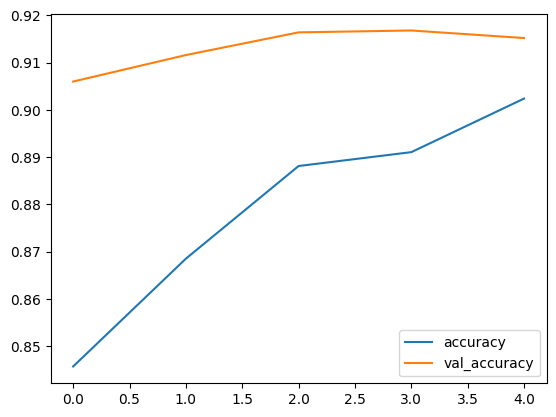

In [ ]:
data = pd.DataFrame(history.history)
data[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
model_3.layers[2].trainable = True
for i,layer in enumerate(model_3.layers[2].layers[:-30]):
  layer.trainable = False

for i,layer in enumerate(model_3.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_8 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.000025), metrics=['accuracy'])
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 1508970 

In [ ]:
history_3 = model_3.fit(train_data,validation_data = test_data,epochs = 15,initial_epoch=10)

Epoch 11/15
235/235 [==============================] - 44s 133ms/step - loss: 0.5982 - accuracy: 0.8357 - val_loss: 0.3073 - val_accuracy: 0.9028
Epoch 12/15
235/235 [==============================] - 29s 122ms/step - loss: 0.4600 - accuracy: 0.8685 - val_loss: 0.2942 - val_accuracy: 0.9116
Epoch 13/15
235/235 [==============================] - 30s 124ms/step - loss: 0.4044 - accuracy: 0.8840 - val_loss: 0.2791 - val_accuracy: 0.9132
Epoch 14/15
235/235 [==============================] - 29s 120ms/step - loss: 0.3691 - accuracy: 0.8912 - val_loss: 0.2696 - val_accuracy: 0.9160
Epoch 15/15
235/235 [==============================] - 30s 125ms/step - loss: 0.3510 - accuracy: 0.8953 - val_loss: 0.2615 - val_accuracy: 0.9180


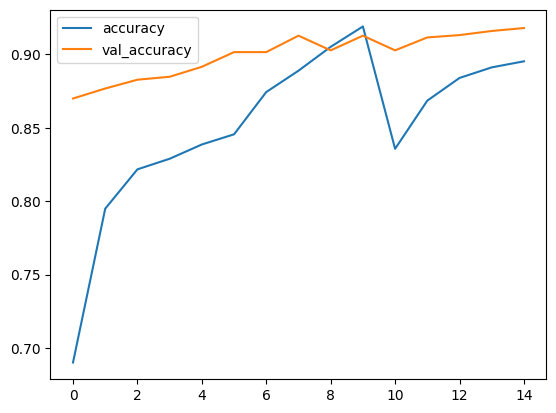

In [ ]:
data_1 = pd.DataFrame(history_1.history)
data_2 = pd.DataFrame(history_2.history)
data_3 = pd.DataFrame(history_3.history)

data = pd.concat([data_1,data_2,data_3]).reset_index(drop=True)
data[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = model_3.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

y_true = []
for image,label in test_data.unbatch():
  y_true.append(np.argmax(label))

y_true = np.array(y_true)


79/79 [==============================] - 6s 72ms/step


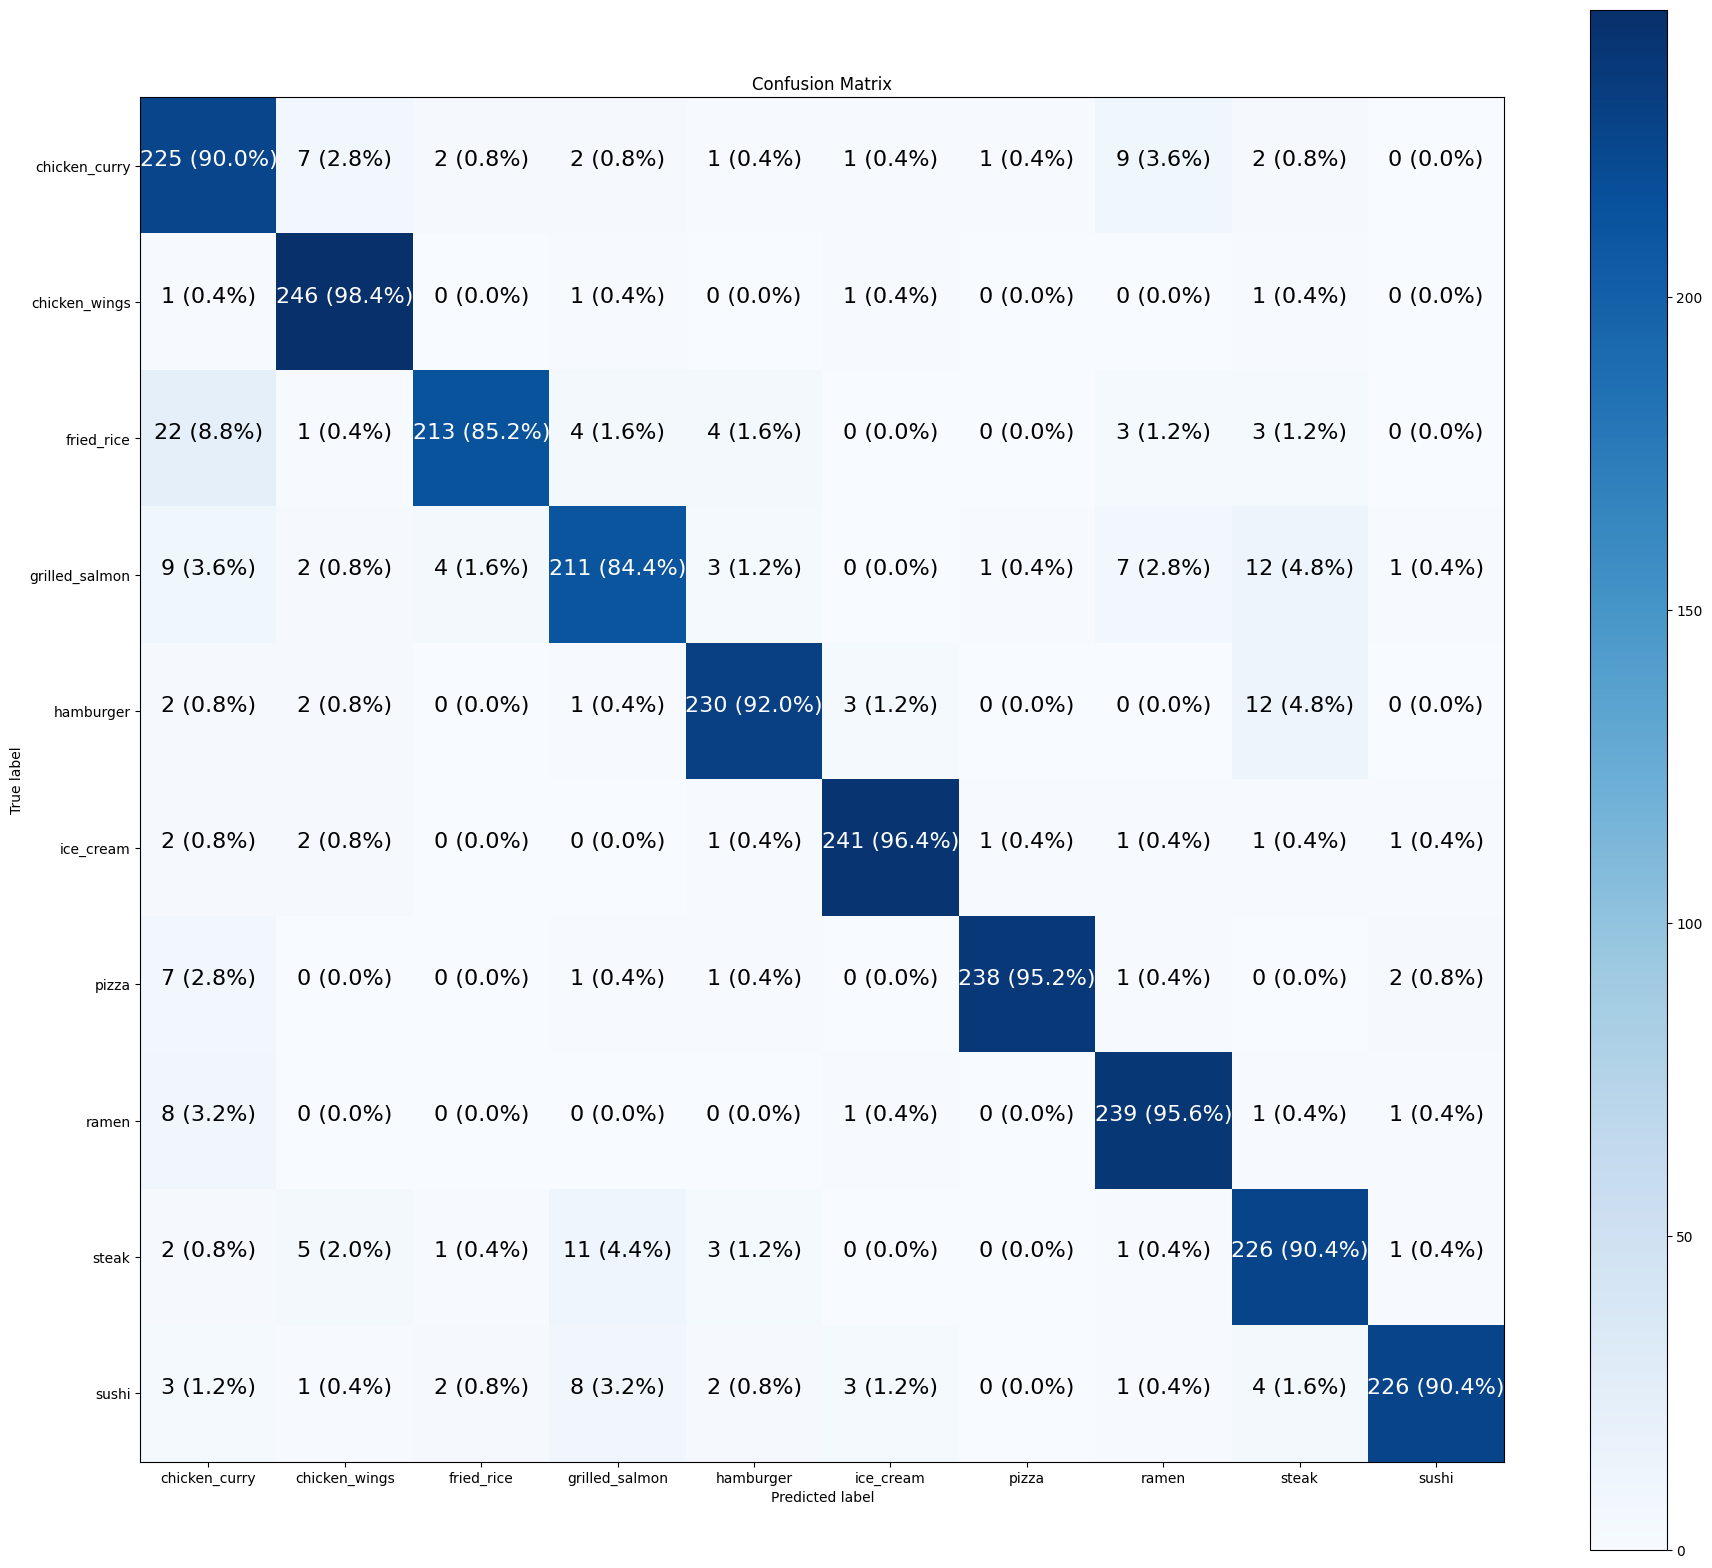

In [ ]:
helper_functions.make_confusion_matrix(y_true,y_pred,classes=test_data.class_names,norm=True,figsize=(22,20),text_size=16)

Visualize most wrong predictions !!

In [ ]:
test_data.list_files('')

InvalidArgumentError: ignored

In [ ]:
pred_df = pd.DataFrame({
    "File_path": [os.path.abspath(file) for file in test_data.file_paths],
    "y_true": y_true,
    'y_pred': y_pred,
    'probability': np.max(model_3.predict(test_data), axis=1),
    'y_true label': [labels[label] for label in y_true],
    'y_pred label': [labels[label] for label in y_pred]
})

pred_df['correct'] = pred_df['y_pred']==pred_df['y_true']
pred_df

79/79 [==============================] - 7s 90ms/step


File_path  y_true  y_pred  \
0     /content/10_food_classes_all_data/test/chicken...       0       0   
1     /content/10_food_classes_all_data/test/chicken...       0       7   
2     /content/10_food_classes_all_data/test/chicken...       0       0   
3     /content/10_food_classes_all_data/test/chicken...       0       0   
4     /content/10_food_classes_all_data/test/chicken...       0       0   
...                                                 ...     ...     ...   
2495  /content/10_food_classes_all_data/test/sushi/9...       9       9   
2496  /content/10_food_classes_all_data/test/sushi/9...       9       9   
2497  /content/10_food_classes_all_data/test/sushi/9...       9       9   
2498  /content/10_food_classes_all_data/test/sushi/9...       9       9   
2499  /content/10_food_classes_all_data/test/sushi/9...       9       9   

      probability   y_true label   y_pred label  correct  
0        0.990189  chicken_curry  chicken_curry     True  
1        0.455261  chicken_curry          ramen    False  
2        0.688895  chicken_curry  chicken_curry     True  
3        0.702970  chicken_curry  chicken_curry     True  
4        0.993386  chicken_curry  chicken_curry     True  
...           ...            ...            ...      ...  
2495     0.984671          sushi          sushi     True  
2496     0.995567          sushi          sushi     True  
2497     0.999643          sushi          sushi     True  
2498     0.997771          sushi          sushi     True  
2499     0.995716          sushi          sushi     True  

[2500 rows x 7 columns]

In [ ]:
from PIL import Image
img = Image.open(pred_df['File_path'][100])


pred_df = pred_df.sort_values('probability',ascending=False)
top_wrong = pred_df[pred_df['correct']==False]
top_wrong.reset_index(inplace=True,drop=True)

TypeError: ignored

In [ ]:
top_wrong.head()

File_path  y_true  y_pred  \
0  /content/10_food_classes_all_data/test/chicken...       0       2   
1  /content/10_food_classes_all_data/test/pizza/2...       6       4   
2  /content/10_food_classes_all_data/test/hamburg...       4       8   
3  /content/10_food_classes_all_data/test/steak/3...       8       3   
4  /content/10_food_classes_all_data/test/fried_r...       2       0   

   probability   y_true label    y_pred label  correct  
0     0.990252  chicken_curry      fried_rice    False  
1     0.983989          pizza       hamburger    False  
2     0.982045      hamburger           steak    False  
3     0.972462          steak  grilled_salmon    False  
4     0.971635     fried_rice   chicken_curry    False

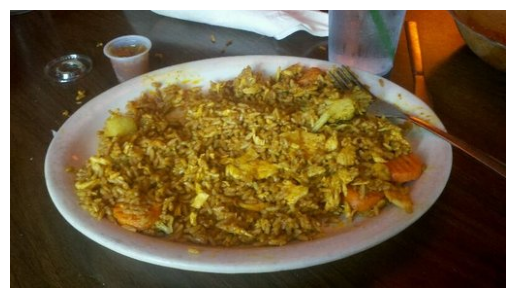

Actual (chicken_curry) predict (fried_rice) perc %99.0


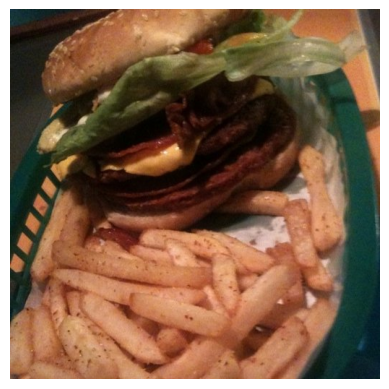

Actual (pizza) predict (hamburger) perc %98.3


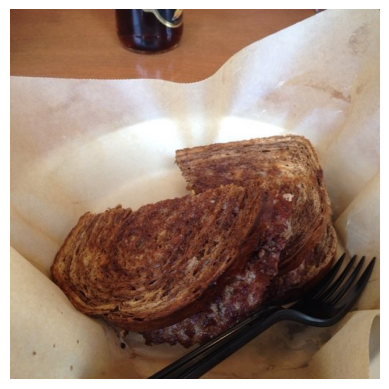

Actual (hamburger) predict (steak) perc %98.2


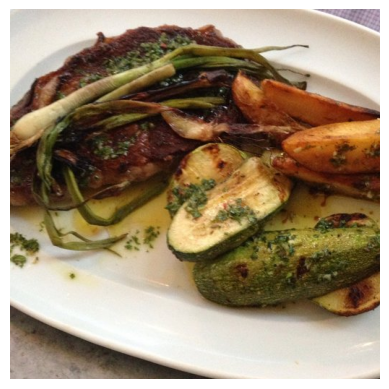

Actual (steak) predict (grilled_salmon) perc %97.2


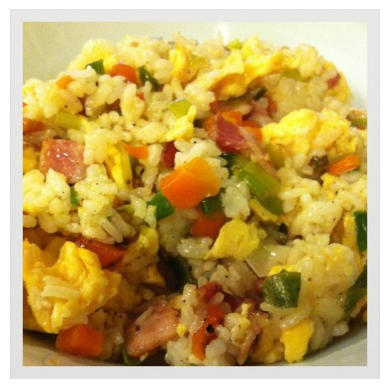

Actual (fried_rice) predict (chicken_curry) perc %97.1


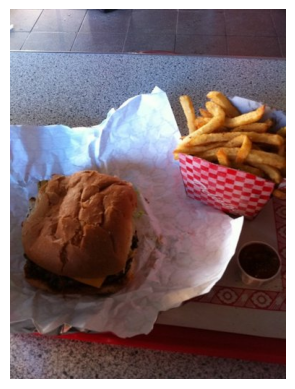

Actual (hamburger) predict (ice_cream) perc %97.1


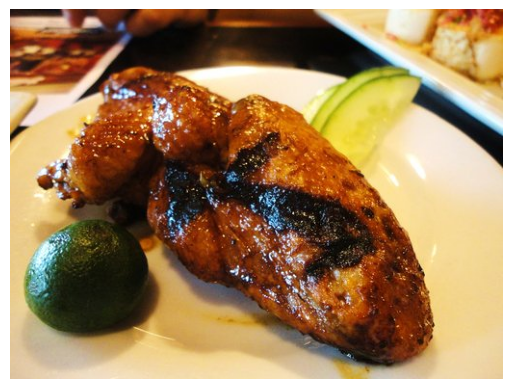

Actual (chicken_wings) predict (grilled_salmon) perc %96.2


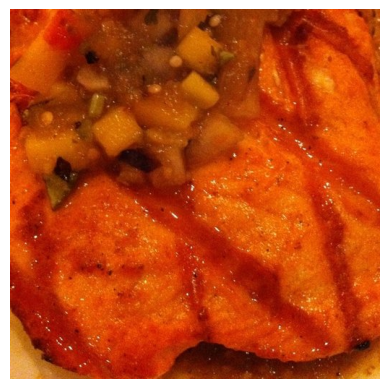

Actual (grilled_salmon) predict (chicken_curry) perc %95.4


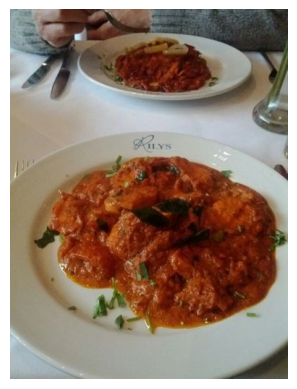

Actual (chicken_curry) predict (chicken_wings) perc %95.2


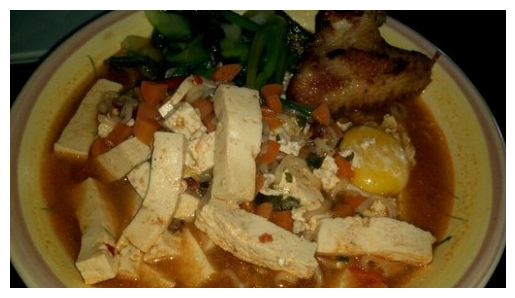

Actual (ramen) predict (chicken_curry) perc %93.6


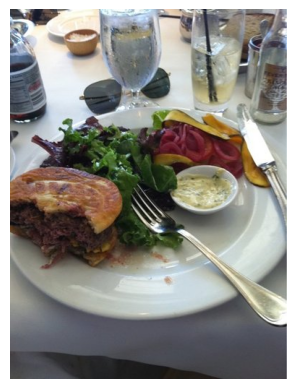

Actual (hamburger) predict (steak) perc %93.0


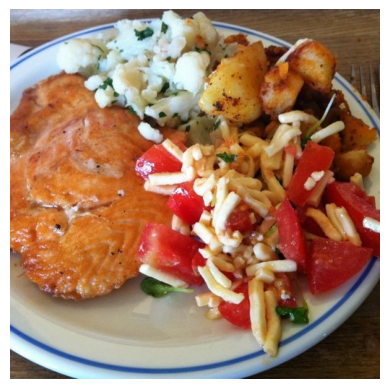

Actual (grilled_salmon) predict (chicken_curry) perc %92.5


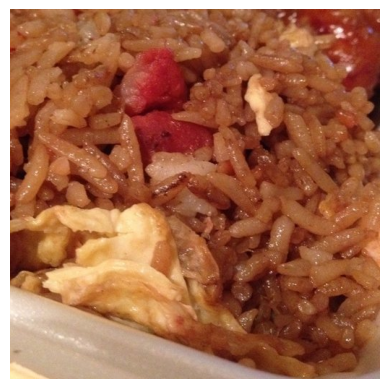

Actual (fried_rice) predict (chicken_curry) perc %91.4


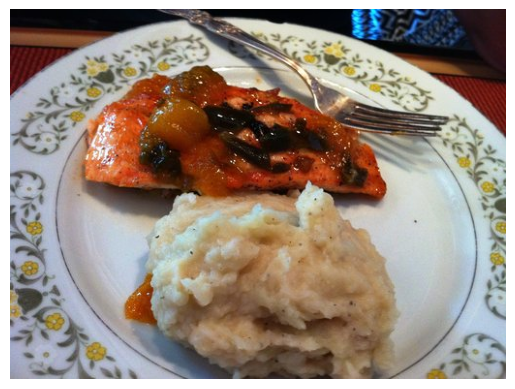

Actual (grilled_salmon) predict (chicken_curry) perc %91.4


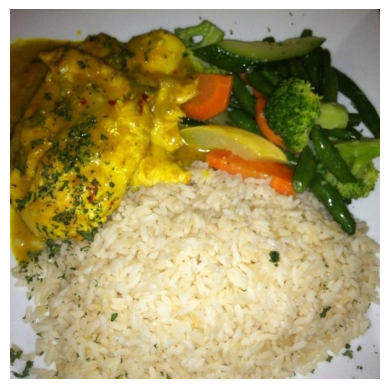

Actual (chicken_curry) predict (grilled_salmon) perc %89.5


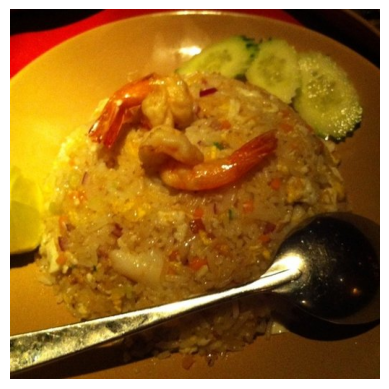

Actual (fried_rice) predict (chicken_curry) perc %89.5


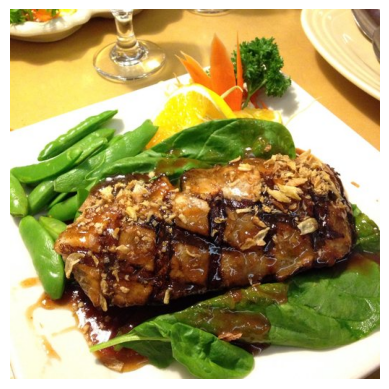

Actual (grilled_salmon) predict (steak) perc %89.3


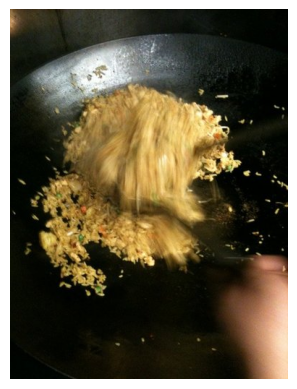

Actual (fried_rice) predict (ramen) perc %89.0


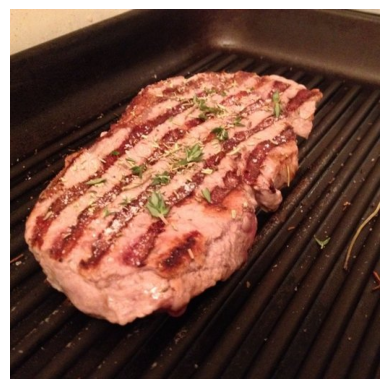

Actual (steak) predict (grilled_salmon) perc %88.2


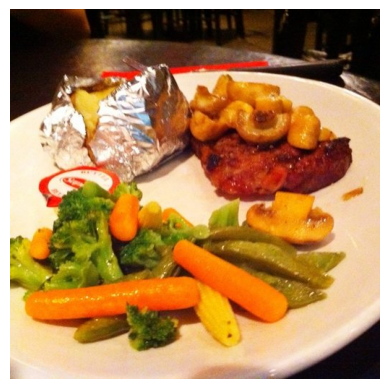

Actual (steak) predict (grilled_salmon) perc %87.6


In [ ]:
for i in range(20):
  img = Image.open(top_wrong['File_path'][i])
  true_label = top_wrong['y_true label'][i]
  pred_label = top_wrong['y_pred label'][i]
  perc = top_wrong['probability'][i]
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  print(f"Actual ({true_label}) predict ({pred_label}) perc %{perc*1000//1/10}")